#Assignment4: Excercise2

In [28]:
#Import usefull libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

##Part (a)

Pairwise Plot of Raw Data

In [29]:
# Load the dataset (update the file path as needed)
df = pd.read_csv("cars-fixed04.dat")
df.iloc[:, 7:18]

,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...
Volvo S80 2.9,37730,35542,2.9,6,208,20,28,3576,110,190,72
Volvo S80 T6,45210,42573,2.9,6,268,19,26,3653,110,190,72
Volvo V40,26135,24641,1.9,4,170,22,29,2822,101,180,68
Volvo XC70,35145,33112,2.5,5,208,20,27,3823,109,186,73


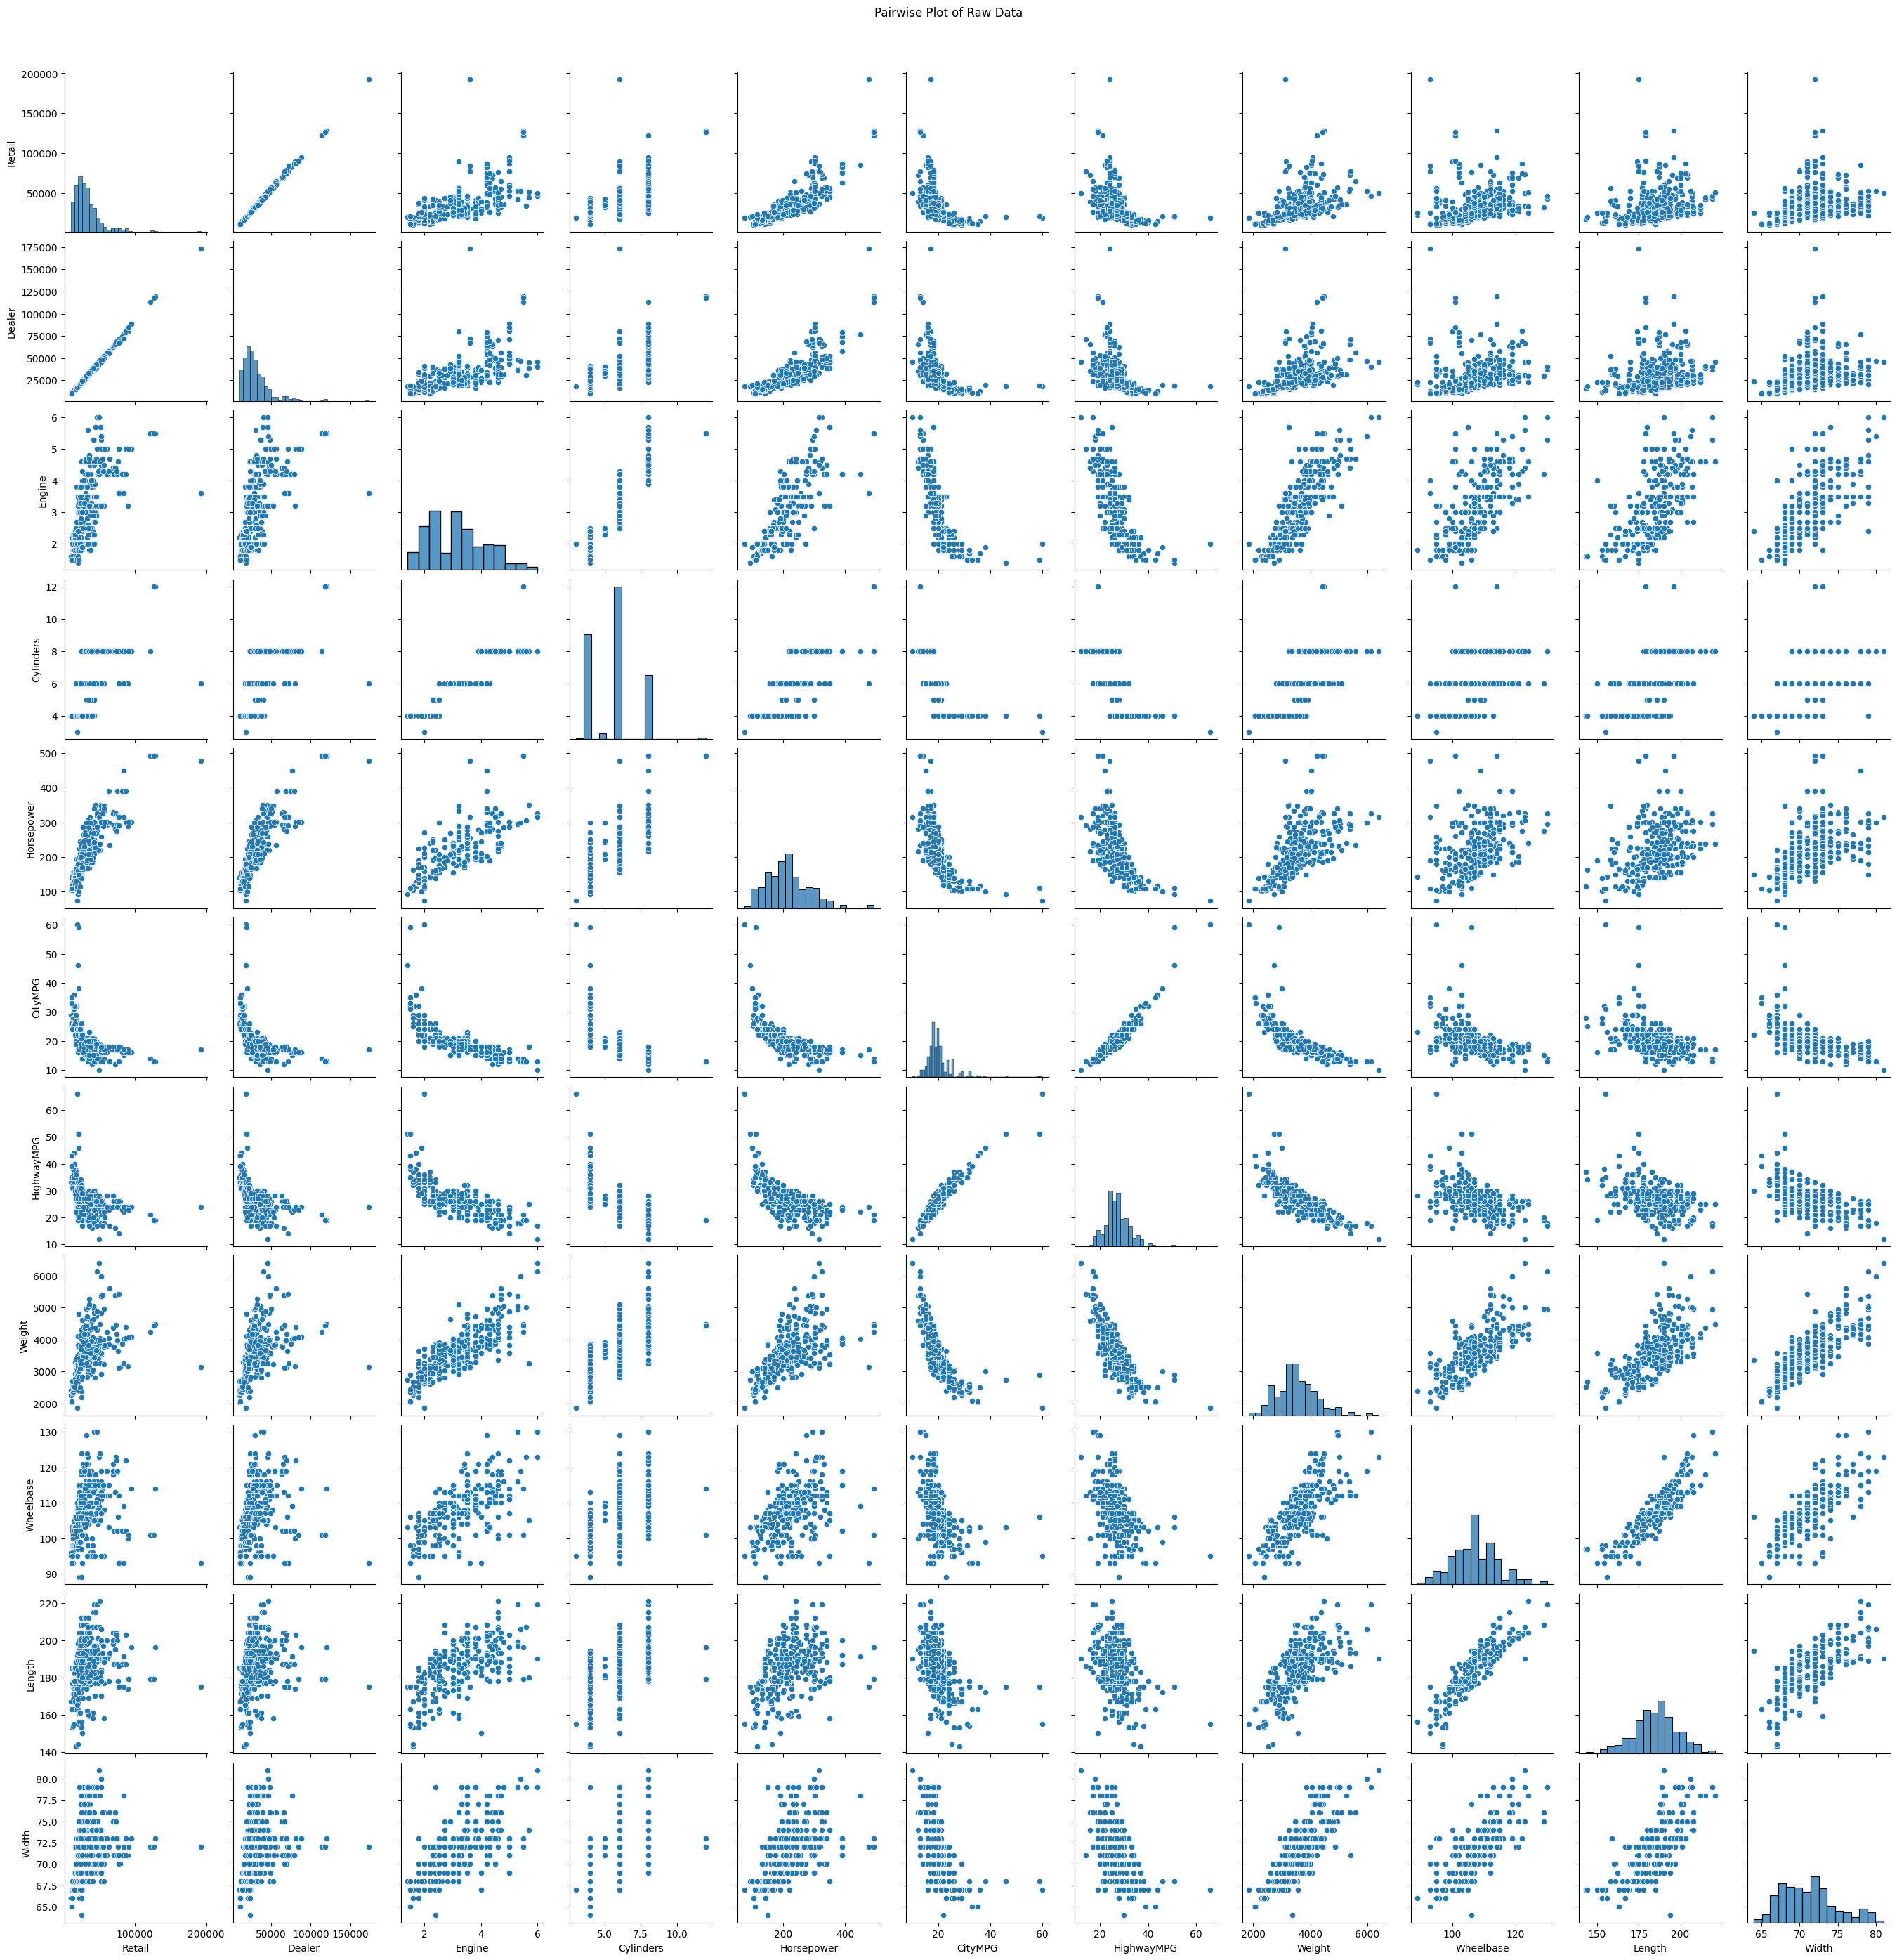

In [30]:
# Select only numerical features for PCA
numerical_features = df.iloc[:, 7:18]

# Generate pairwise plot
sns.pairplot(numerical_features)
plt.suptitle("Pairwise Plot of Raw Data", y=1.02)
plt.show()

Which shows scatter plots for each pair and histograms for individual features along the diagonal.

##Part (b)

Covariance Heatmap

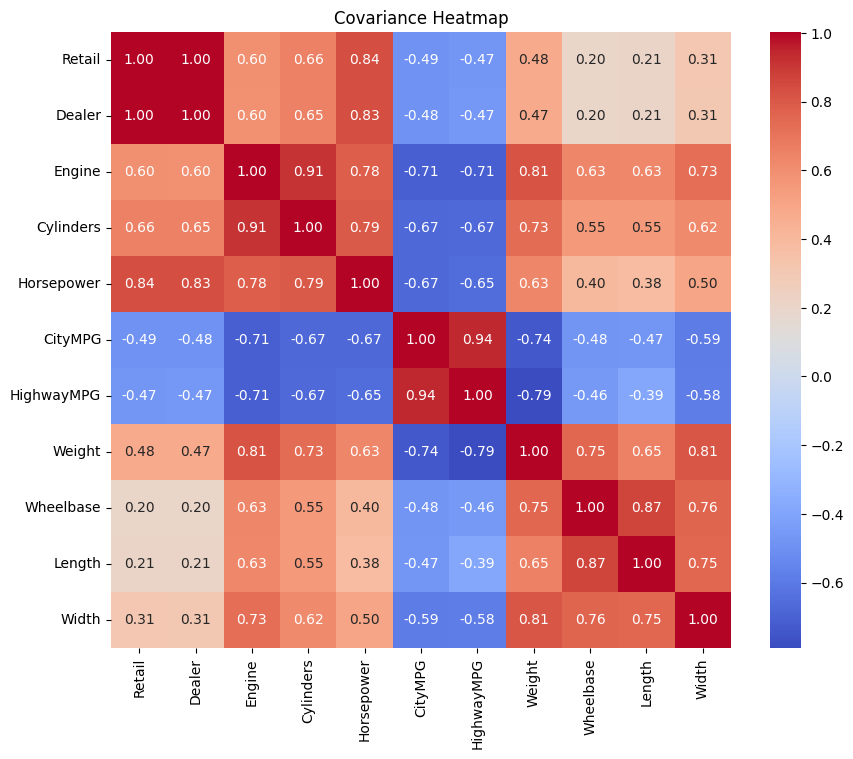

In [31]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Compute covariance matrix
cov_matrix = np.cov(scaled_data, rowvar=False)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=numerical_features.columns, yticklabels=numerical_features.columns)
plt.title("Covariance Heatmap")
plt.show()

Explanation:


*   The heatmap illustrates how strongly pairs of features are correlated.
*   Large positive or negative values indicate strong linear relationships.

##Part (c)

 Applying PCA and Scree Plot

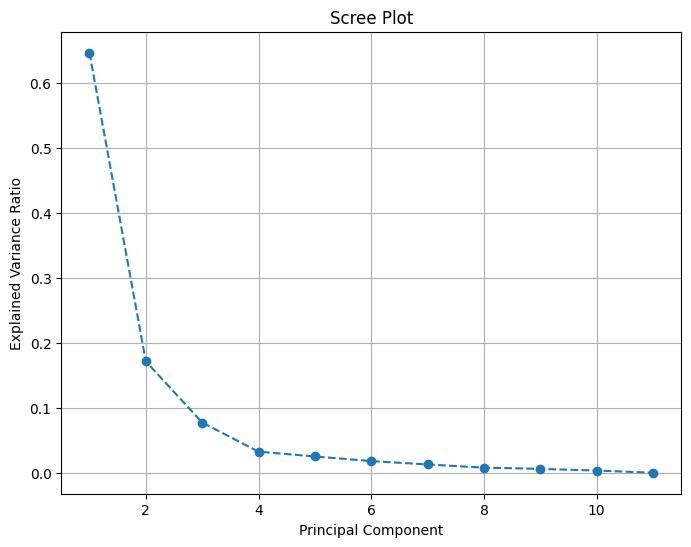

Number of components needed to explain at least 80% variance: 2
Loadings or Weight Matrix for the first two components:
                 PC1       PC2
Retail      0.263750  0.468509
Dealer      0.262319  0.470147
Engine      0.347080 -0.015347
Cylinders   0.334189  0.078032
Horsepower  0.318602  0.292213
CityMPG    -0.310482 -0.003366
HighwayMPG -0.306589 -0.010964
Weight      0.336329 -0.167464
Wheelbase   0.266210 -0.418177
Length      0.256790 -0.408411
Width       0.296055 -0.312891


In [32]:
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid()
plt.show()

# Find the number of components explaining at least 80% variance
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components needed to explain at least 80% variance: {num_components}")
# Print the loadings or weight matrix for the first two components
print("Loadings or Weight Matrix for the first two components:")
loadings_matrix = pd.DataFrame(pca.components_[:2, :].T, columns=['PC1', 'PC2'], index=numerical_features.columns)
print(loadings_matrix)


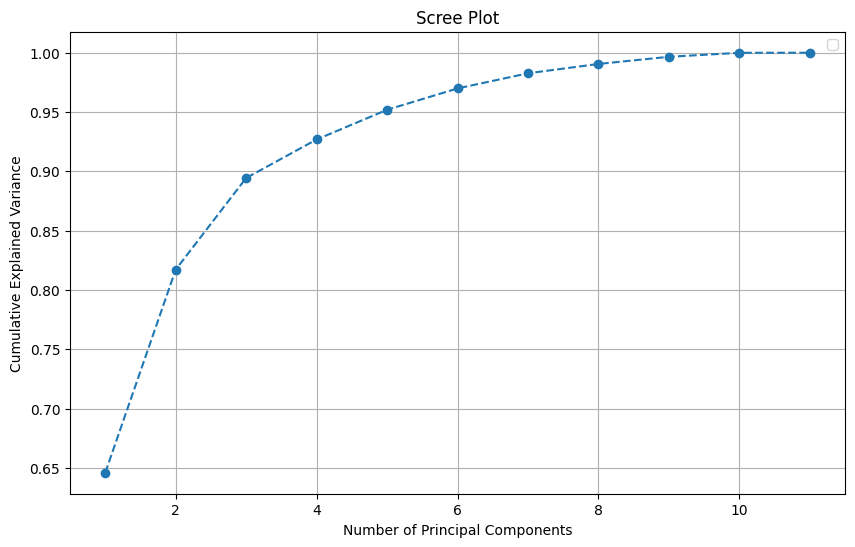

Loadings or Weight Matrix for the first two components:
                 PC1       PC2
Retail      0.263750  0.468509
Dealer      0.262319  0.470147
Engine      0.347080 -0.015347
Cylinders   0.334189  0.078032
Horsepower  0.318602  0.292213
CityMPG    -0.310482 -0.003366
HighwayMPG -0.306589 -0.010964
Weight      0.336329 -0.167464
Wheelbase   0.266210 -0.418177
Length      0.256790 -0.408411
Width       0.296055 -0.312891


In [33]:
#Using cumulative sum
# Standardize the numerical features
scaler = StandardScaler()
numerical_features_standardized = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA()
pca.fit(numerical_features_standardized)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)



# Find the number of components to explain at least 80% of the variance
n_components_80_percent = np.argmax(cumulative_explained_variance >= 0.8) + 1

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

# Print the loadings or weight matrix for the first two components
print("Loadings or Weight Matrix for the first two components:")
loadings_matrix = pd.DataFrame(pca.components_[:2, :].T, columns=['PC1', 'PC2'], index=numerical_features.columns)
print(loadings_matrix)

### Scree Plot Analysis

**Observations**
 1. From the Scree Plot, the **first principal component** explains a significant portion of the variance (~40%).
 2. The **second component** contributes ~20%, and the **third component** adds ~10%.
 3. Beyond the **second component**, the explained variance ratio decreases significantly, with each additional component contributing marginally.

**Cumulative Variance**
 - The cumulative variance explained reaches **80% with 2 components**, as indicated in the plot.
 - This means that the first five components collectively capture most of the information in the dataset.

**Elbow Point**
 - The plot shows a clear "elbow" after the first few components. This suggests that adding more components beyond the elbow offers diminishing returns in terms of variance explained.

**Interpretation**
 1. **Dimensionality Reduction**:
     - The dataset can be reduced from its original number of dimensions (11) to **2 components** without significant loss of information.
     - This reduction simplifies further analysis and reduces computational complexity.
 2. **Explained Variance**:
     - The first principal component captures the most dominant feature or pattern in the dataset.
     - The top **2 components** retain enough variance to effectively represent the data.

**Conclusion**
 - **Number of Components**: Based on the Scree Plot and cumulative variance, **2 components** are sufficient to represent the dataset while preserving at least 80% of the variance.
 - **Next Steps**: So we can use the reduced 2-dimensional dataset for further analysis or visualization.


##Part (d)

PCA Plot (First Two Principal Components)

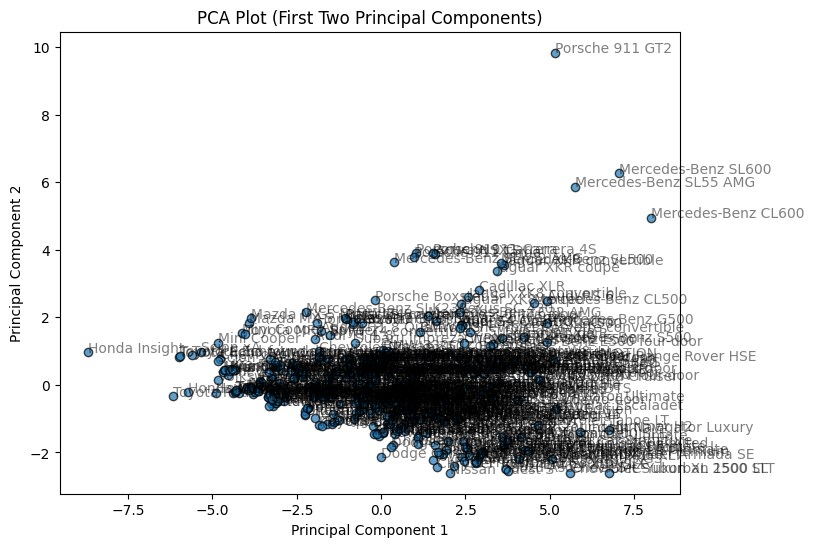

In [34]:
# Reduce data to the first two principal components
pca_2d = PCA(n_components=2)
reduced_data = pca_2d.fit_transform(scaled_data)

# Create a scatter plot of the projected data
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7, edgecolor='k')
plt.title("PCA Plot (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# Add labels for each data point
for i, label in enumerate(numerical_features.index):
    plt.annotate(label, (reduced_data[i, 0], reduced_data[i, 1]), alpha=0.5)
plt.show()


###Interpretation of the PCA Plot

1. **Overview**:
   - The PCA plot shows the dataset projected onto the first two principal components, which together capture the most significant variance in the data.

2. **Observations**:
   - **Clusters**: No clear distinct clusters are visible, indicating that the data points are distributed without strong separations in the reduced 2D space.
   - **Spread**:
     - The first principal component (x-axis) captures the largest variance, with values ranging approximately from -7.5 to 7.5.
     - The second principal component (y-axis) shows less variance, with a range of about -2 to 10.
   - **Outliers**: A few points are further away from the majority, such as those at the top-right, which may represent outliers.

3. **Conclusion**:
   - The first two principal components provide a meaningful representation of the dataset, with most data points clustered near the origin and a few scattered points showing variability.
